# Country demonstration for boundary uncertainty and comparison across sources

## Imports

In [1]:
# imports
import boundarytools
import numpy as np

import json
from urllib.request import urlopen

## Load in a set of country boundaries from NaturalEarth and GADM

In [2]:
# set params
country = 'LUX' #'TUN' #'BDI' #'BLR' #'LUX' #'CHE'

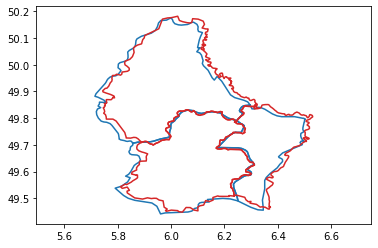

In [13]:
# load data
topoj = json.loads(urlopen('https://media.githubusercontent.com/media/wmgeolab/geoContrast/main/releaseData/naturalEarth/{country}/ADM1/naturalEarth-{country}-ADM1.topojson'.format(country=country)).read())
coll1 = boundarytools.utils.topo2geoj(topoj)
boundaries1 = [boundarytools.uncertainty.NormalBoundary(f['geometry']) for f in coll1['features']]

topoj = json.loads(urlopen('https://media.githubusercontent.com/media/wmgeolab/geoContrast/main/releaseData/gadm/{country}/ADM1/gadm-{country}-ADM1.topojson'.format(country=country)).read())
coll2 = boundarytools.utils.topo2geoj(topoj)
boundaries2 = [boundarytools.uncertainty.NormalBoundary(f['geometry']) for f in coll2['features']]

boundarytools.utils.show_datasets(coll1, coll2)

## First let's try probability that boundaries are different

In [4]:
# set params
res = 0.005

In [5]:
# get diff
diff = boundarytools.compare.symmetric_difference_probability_surface(boundaries1, boundaries2, resolution=res) #, bbox=bbox)

1 <boundarytools.uncertainty.NormalBoundary object at 0x000001E07F2D7D90>
2 <boundarytools.uncertainty.NormalBoundary object at 0x000001E07F116970>
3 <boundarytools.uncertainty.NormalBoundary object at 0x000001E07F14CC10>


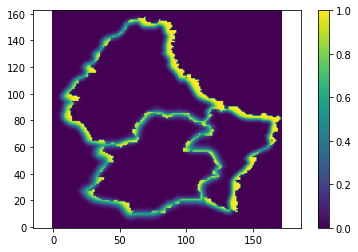

In [6]:
# show
boundarytools.utils.show_surface(diff)

In [7]:
# calc stats
allinside1 = boundarytools.uncertainty.probability_inside(boundaries1, resolution=res)

share = (diff>0.05).sum() / (allinside1>0).sum() * 100 # count the full pixel where there is any diff/doubt
print('share of country where there is some level of disagreement (>5% probability) across the two sources:')
print('{:.2f}%'.format(share))

share = (diff>0.95).sum() / (allinside1>0).sum() * 100 # count only the highly doubtfull pixels
print('share of country that almost surely disagrees (>95% probability) across the two sources:')
print('{:.2f}%'.format(share))


share of country where there is some level of disagreement (>5% probability) across the two sources:
33.26%
share of country that almost surely disagrees (>95% probability) across the two sources:
4.95%


## Second let's try the degree to which each set of overlapping boundaries can be considered equivalent

1 <boundarytools.uncertainty.NormalBoundary object at 0x000001E07F2D7D90>
2 <boundarytools.uncertainty.NormalBoundary object at 0x000001E07F116970>
3 <boundarytools.uncertainty.NormalBoundary object at 0x000001E07F14CC10>


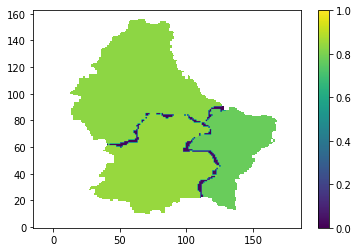

In [8]:
# calc similarity surface
simil = boundarytools.compare.similarity_surface(boundaries1, boundaries2, 'equality', resolution=res)
boundarytools.utils.show_surface(simil, 0, 1)

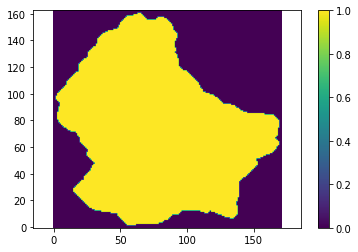

In [9]:
# hypothetical perfectly equality scenario
# ie if all pixels had perfect 1.0 similarity (for pixels mostly inside the boundary)
allinside1 = boundarytools.uncertainty.probability_inside(boundaries1, resolution=res)
perfectsimil = np.where(allinside1>0, 1, 0)
boundarytools.utils.show_surface(perfectsimil)

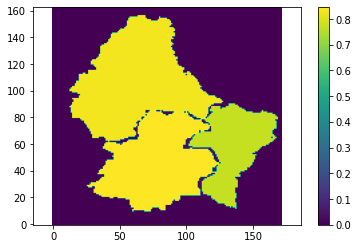

sum total of overlapping boundary unit equality values across the two sources:
65.75%


In [10]:
# weighted sum
# ie sum the weighted similarity for each no-nan pixel
nonan = np.where(~np.isnan(simil), simil, 0)
boundarytools.utils.show_surface(nonan)
perc = nonan.sum() / perfectsimil.sum() * 100
print('sum total of overlapping boundary unit equality values across the two sources:')
print('{:.2f}%'.format(perc))

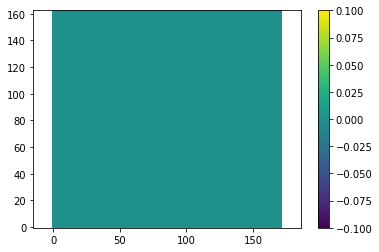

share of pixels with overlapping boundary units considered highly similar (>0.9 equality) across the two sources:
0.00%


In [11]:
# high similarity
# ie share of pixels above 0.9 equal (not weighted, each pixel is 0/1 above or below threshold)
highsimil = np.where(simil >= 0.9, 1, 0)
boundarytools.utils.show_surface(highsimil)
perc = highsimil.sum() / perfectsimil.sum() * 100
print('share of pixels with overlapping boundary units considered highly similar (>0.9 equality) across the two sources:')
print('{:.2f}%'.format(perc))

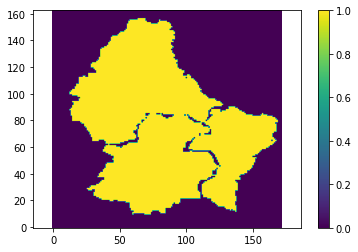

share of pixels with overlapping boundary units considered mostly similar (>0.7 equality) across the two sources:
79.73%


In [12]:
# medium similarity
# ie share of pixels above 0.7 equal (not weighted, each pixel is 0/1 above or below threshold)
medsimil = np.where(simil >= 0.7, 1, 0)
boundarytools.utils.show_surface(medsimil)
perc = medsimil.sum() / perfectsimil.sum() * 100
print('share of pixels with overlapping boundary units considered mostly similar (>0.7 equality) across the two sources:')
print('{:.2f}%'.format(perc))